In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Imports essential libraries for data manipulation, visualization, and statistical plotting.

# Read excel file

In [2]:
energy_data = pd.read_excel(r"C:\Users\dell\Downloads\energy_dataset (1).xlsx")
weather_data = pd.read_excel(r"C:\Users\dell\Downloads\weather_features.xlsx")

Loads the energy and weather datasets from Excel files.

In [3]:
weather_data = weather_data.drop(columns=['city_name'])

Removes the 'city_name' column from the weather dataset.

# DESCRIPTIVE STATISTICS 

In [5]:
def most_frequent(series):
    return series.mode()[0]
weather_data = weather_data.groupby('dt_iso').agg(
    {
        'temp': 'mean',
        'temp_min': 'mean',
        'temp_max': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'wind_deg': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean',
        'weather_id': 'mean',
        'weather_main': most_frequent,
        'weather_description': most_frequent,
        'weather_icon': most_frequent
    }
).reset_index()

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes

Displays summary statistics for the weather dataset.

In [6]:
print(weather_data.head(10))

                      dt_iso        temp    temp_min    temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  272.491463  272.491463  272.491463    1016.4   
1  2015-01-01 01:00:00+01:00  272.512700  272.512700  272.512700    1016.2   
2  2015-01-01 02:00:00+01:00  272.099137  272.099137  272.099137    1016.8   
3  2015-01-01 03:00:00+01:00  272.089469  272.089469  272.089469    1016.6   
4  2015-01-01 04:00:00+01:00  272.145900  272.145900  272.145900    1016.6   
5  2015-01-01 05:00:00+01:00  272.024000  272.024000  272.024000    1017.4   
6  2015-01-01 06:00:00+01:00  272.058400  272.058400  272.058400    1017.4   
7  2015-01-01 07:00:00+01:00  272.346600  272.346600  272.346600    1017.6   
8  2015-01-01 08:00:00+01:00  273.993600  273.993600  273.993600    1018.8   
9  2015-01-01 09:00:00+01:00  274.197200  274.197200  274.197200    1018.8   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      82.4         2.0     135.2      0.0      0.0      0.0     

In [7]:
op_file_path = (r"C:\Users\dell\newFile_excel.xlsx")
weather_data.to_excel(op_file_path, index=False)

In [8]:
weather_data.shape

(35064, 16)

In [9]:
energy_data['time'] = pd.to_datetime(energy_data['time'])
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'])

In [10]:
merged_data = pd.merge(energy_data, weather_data, left_on='time', right_on='dt_iso', how='left')


In [11]:
merged_data.drop(columns=['dt_iso'], inplace=True)
print(merged_data.head())

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.

In [12]:
merged_data['time'] = merged_data['time'].astype(str)

In [13]:
op_file_path = (r"C:\Users\dell\merged.xlsx")
merged_data.to_excel(op_file_path, index=False)
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [18]:
data = pd.read_excel('modified_file.xlsx')
# Check if the 'rain_3h' column is completely null
if data['rain_3h'].isnull().all():
    print("The column 'rain_3h' is completely null.")
else:
    print("The column 'rain_3h' is not completely null.")


The column 'rain_3h' is not completely null.


In [2]:
import pandas as pd
data = pd.read_excel(r"C:\Users\dell\modified_file.xlsx")
columns_to_drop = ['generation fossil coal-derived gas']
data.drop(columns=columns_to_drop, inplace=True)

# Shape

In [3]:
data.shape

(35064, 36)

In [2]:
import pandas as pd

# Load the spreadsheet
file_path = (r'C:\Users\dell\modified_file.xlsx')
spreadsheet = pd.ExcelFile(file_path)

# Create a dictionary to store the filled dataframes
filled_dfs = {}

# Iterate over each sheet, fill missing values, and store the results
for sheet_name in spreadsheet.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df_filled = df.ffill().bfill()  # First forward fill, then backward fill
    filled_dfs[sheet_name] = df_filled

# Save the filled dataframes back to an Excel file
with pd.ExcelWriter('filled_modified_file.xlsx') as writer:
    for sheet_name, df in filled_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Missing values handled and saved to 'filled_modified_file.xlsx'")


Missing values handled and saved to 'filled_modified_file.xlsx'


# Columns

In [5]:
import pandas as pd
data = pd.read_excel(r"C:\Users\dell\filled_modified_file.xlsx")

In [8]:
columns = data.columns.tolist()
print(columns)

['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'weather_icon']


Displays the column names from the dataset.

In [9]:
columns_to_drop=('generation fossil coal-derived gas')
data.drop(columns=columns_to_drop,inplace=True)

In [10]:
data.shape

(35064, 36)

# Info

In [11]:
data.info

<bound method DataFrame.info of                             time  generation biomass  \
0      2015-01-01 00:00:00+01:00                 447   
1      2015-01-01 01:00:00+01:00                 449   
2      2015-01-01 02:00:00+01:00                 448   
3      2015-01-01 03:00:00+01:00                 438   
4      2015-01-01 04:00:00+01:00                 428   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00                 297   
35060  2018-12-31 20:00:00+01:00                 296   
35061  2018-12-31 21:00:00+01:00                 292   
35062  2018-12-31 22:00:00+01:00                 293   
35063  2018-12-31 23:00:00+01:00                 290   

       generation fossil brown coal/lignite  generation fossil gas  \
0                                       329                   4844   
1                                       328                   5196   
2                                       323                   4857   
3              

# Missing value analysis

In [12]:
print("\nMissing Value Analysis:")
missing_values = data.isnull().sum()
print(missing_values)


Missing Value Analysis:
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                             

Analyzes missing values and showing the count of missing values for each column.

# Outlier detection and replacement 

In [25]:
print("\nOutlier Detection and Replacement:")
numeric_cols = data.select_dtypes(include=np.number).columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())
for col in numeric_cols:
        median = data[col].median()
        data[col] = np.where(outliers[col], median, data[col])


Outlier Detection and Replacement:
generation biomass                               87
generation fossil brown coal/lignite              0
generation fossil gas                          2185
generation fossil hard coal                       0
generation fossil oil                           246
generation hydro pumped storage consumption    3762
generation hydro run-of-river and poundage        0
generation hydro water reservoir                343
generation nuclear                               79
generation other                               1267
generation other renewable                        5
generation solar                                  0
generation waste                                328
generation wind onshore                         377
forecast solar day ahead                          0
forecast wind onshore day ahead                 436
total load forecast                               0
total load actual                                 0
price day ahead             

Detects outliers in each numerical column using the IQR method and counts using the IQR method 
Replaces outliers in each numerical column with the median value of that column.

# feature engineering 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file path)

df = pd.read_excel(r"C:\Users\dell\filled_modified_file.xlsx")

# Feature engineering
df['time'] = pd.to_datetime(df['time'], utc=True)

# Hour of Day
df['hour'] = pd.to_datetime(df['time']).dt.hour

# Day of Week
df['day_of_week'] = pd.to_datetime(df['time']).dt.dayofweek

# Season/Month
df['month'] = pd.to_datetime(df['time']).dt.month

# Temperature Lags
df['temp_lag1'] = df['temp'].shift(1)
df['temp_lag2'] = df['temp'].shift(2)

# Temperature Squared/Cubed
df['temp_squared'] = df['temp'] ** 2
df['temp_cubed'] = df['temp'] ** 3

# Lagged Demand
df['demand_lag1'] = df['total load actual'].shift(1)
df['demand_lag2'] = df['total load actual'].shift(2)

# Rolling Statistics
df['temp_roll_mean_3h'] = df['temp'].rolling(window=3).mean()

# Demand Trend
df['demand_trend'] = df['total load actual'] - df['demand_lag1']

# Lagged Price
df['price_lag1'] = df['price actual'].shift(1)
df['price_lag2'] = df['price actual'].shift(2)

# Rolling Statistics of Price
df['price_roll_mean_6h'] = df['price actual'].rolling(window=6).mean()

# Normalization/Standardization
df['temp_normalized'] = (df['temp'] - df['temp'].min()) / (df['temp'].max() - df['temp'].min())

# One-Hot Encoding
df = pd.get_dummies(df, columns=['weather_main'])

# Print the updated DataFrame to see the new features
print(df.head())

# Save the updated DataFrame to a new CSV file if needed
df.to_csv('updated_dataset.csv', index=False)


                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00                 447   
1 2015-01-01 00:00:00+00:00                 449   
2 2015-01-01 01:00:00+00:00                 448   
3 2015-01-01 02:00:00+00:00                 438   
4 2015-01-01 03:00:00+00:00                 428   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                   329                                   0   
1                                   328                                   0   
2                                   323                                   0   
3                                   254                                   0   
4                                   187                                   0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                   4844                         4821                    162   
1                   5196                         4755     

In [13]:
print(df.head())
column_headers = df.columns
print(column_headers)

                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00                 447   
1 2015-01-01 00:00:00+00:00                 449   
2 2015-01-01 01:00:00+00:00                 448   
3 2015-01-01 02:00:00+00:00                 438   
4 2015-01-01 03:00:00+00:00                 428   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                   329                                   0   
1                                   328                                   0   
2                                   323                                   0   
3                                   254                                   0   
4                                   187                                   0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                   4844                         4821                    162   
1                   5196                         4755     

This script demonstrates a comprehensive feature engineering process using a pandas DataFrame loaded from a CSV file

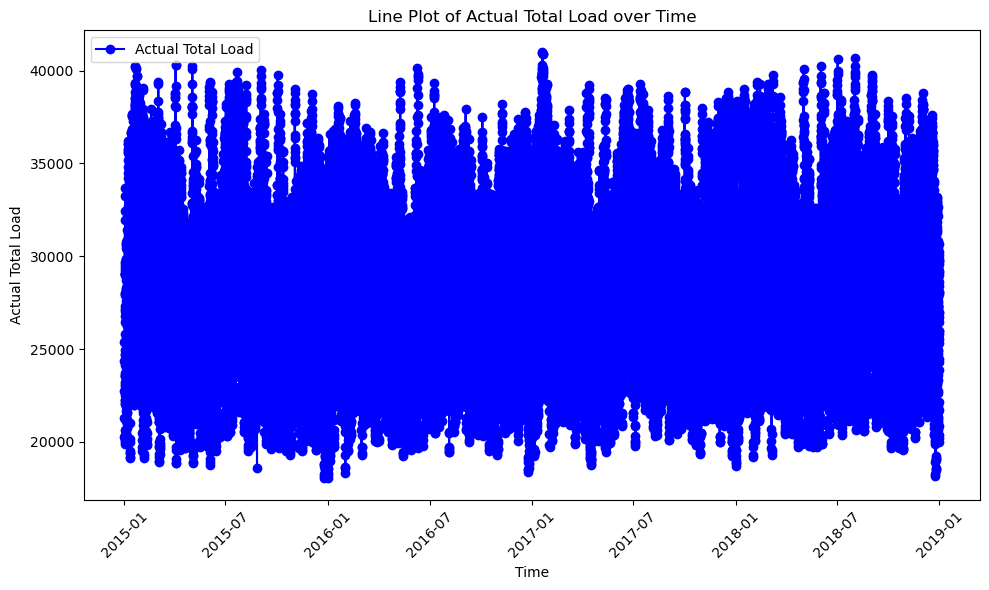

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['total load actual'], marker='o', linestyle='-', color='b', label='Actual Total Load')
plt.title('Line Plot of Actual Total Load over Time')
plt.xlabel('Time')
plt.ylabel('Actual Total Load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


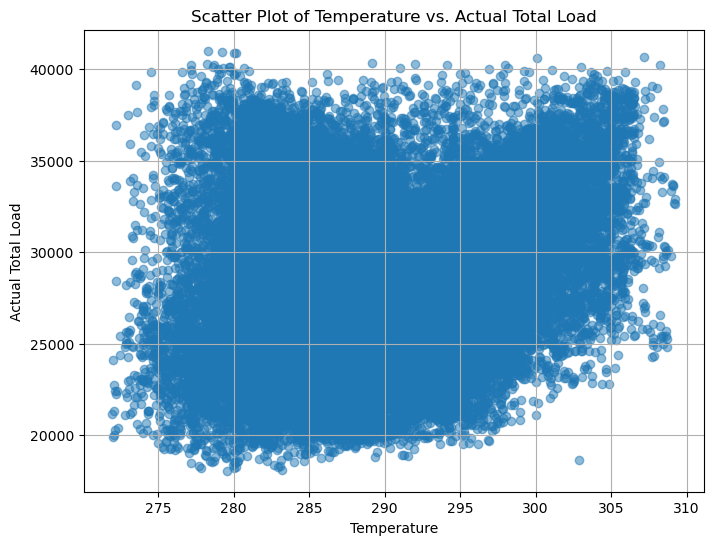

In [16]:
# Scatter plot example
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['total load actual'], alpha=0.5)
plt.title('Scatter Plot of Temperature vs. Actual Total Load')
plt.xlabel('Temperature')
plt.ylabel('Actual Total Load')
plt.grid(True)
plt.show()


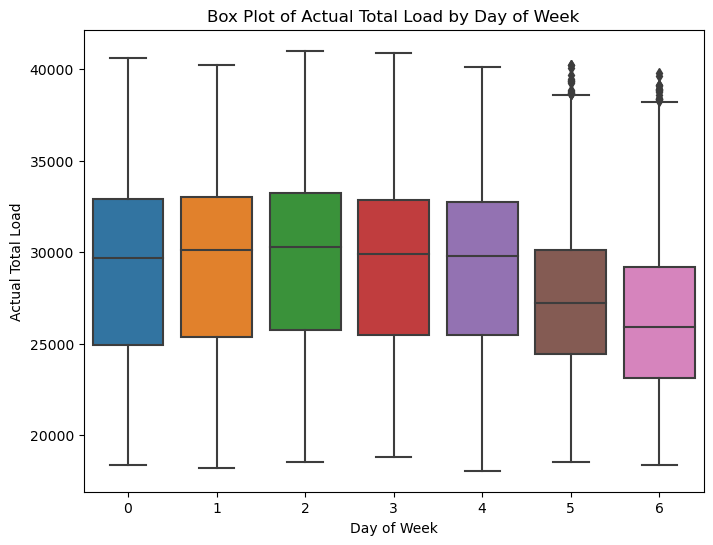

In [17]:
# Box plot example
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_week', y='total load actual', data=df)
plt.title('Box Plot of Actual Total Load by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Actual Total Load')
plt.show()


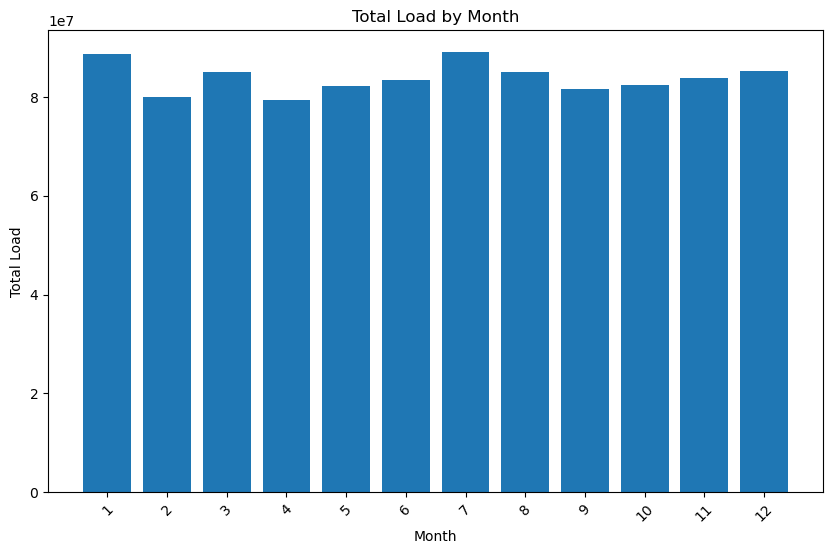

In [18]:
# Example of a bar chart
plt.figure(figsize=(10, 6))
df_monthly_load = df.groupby('month')['total load actual'].sum()
plt.bar(df_monthly_load.index, df_monthly_load.values)
plt.title('Total Load by Month')
plt.xlabel('Month')
plt.ylabel('Total Load')
plt.xticks(df_monthly_load.index, rotation=45)
plt.show()


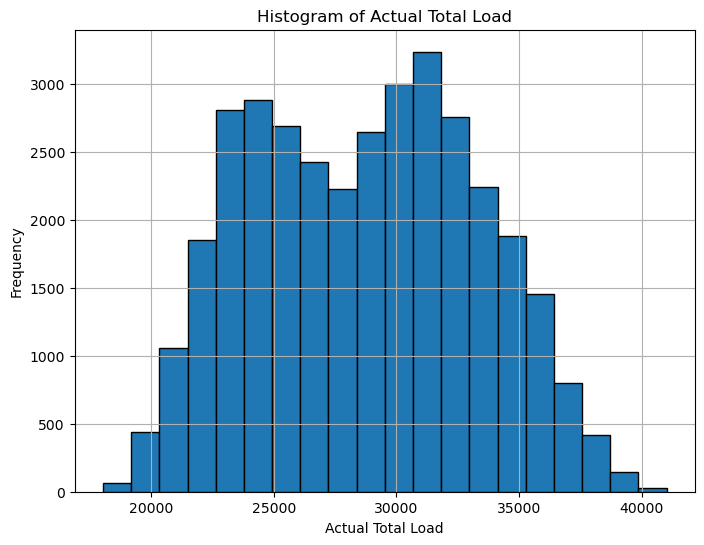

In [19]:
# Example of a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['total load actual'], bins=20, edgecolor='black')
plt.title('Histogram of Actual Total Load')
plt.xlabel('Actual Total Load')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


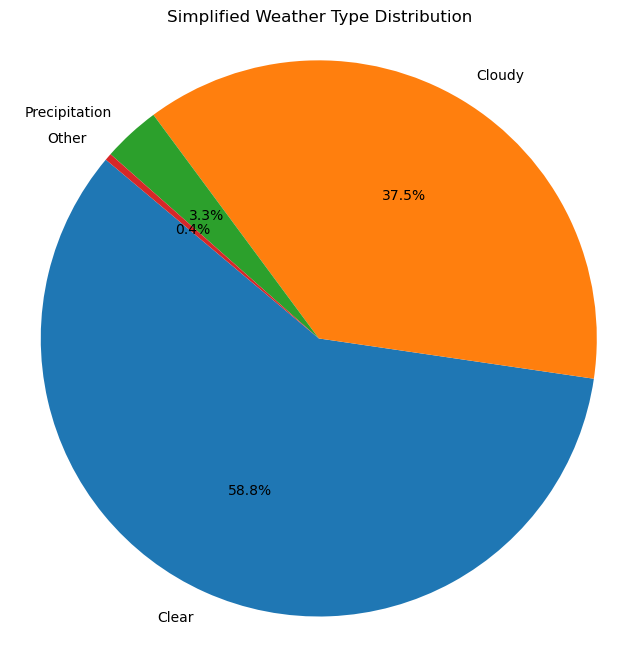

In [23]:
import matplotlib.pyplot as plt

# Example of a simplified pie chart
plt.figure(figsize=(8, 8))

# Define broader weather categories
weather_categories = {
    'Clear': ['weather_main_clear'],
    'Cloudy': ['weather_main_clouds'],
    'Precipitation': ['weather_main_drizzle', 'weather_main_rain'],
    'Other': ['weather_main_fog', 'weather_main_haze', 'weather_main_mist', 'weather_main_thunderstorm']
}

# Calculate counts for each weather category
weather_counts = {category: df[cols].sum().sum() for category, cols in weather_categories.items()}

# Plotting the pie chart
plt.pie(weather_counts.values(), labels=weather_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Simplified Weather Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [25]:
df.shape
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_description', 'weather_icon', 'hour',
       'day_of_week', 'month', 'temp_lag1', 'temp_lag2', 'temp_squared',
       'temp_cubed', 'demand_lag1', 'demand_lag

In [30]:
import pandas as pd

# Assuming 'df' is your DataFrame with timezone-aware datetime columns

# Convert datetime columns to string
df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Save DataFrame to Excel
df.to_excel('project.xlsx', index=False)


In [31]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel(r"C:\Users\dell\Project.xlsx")

# Clean the data by filling missing values
df = df.ffill().bfill()

# Convert datetime columns to string format if needed
# Example: Convert 'time' column to string
if 'time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['time']):
    df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Save the cleaned DataFrame back to Excel
df.to_excel('cleaned_file.xlsx', index=False)


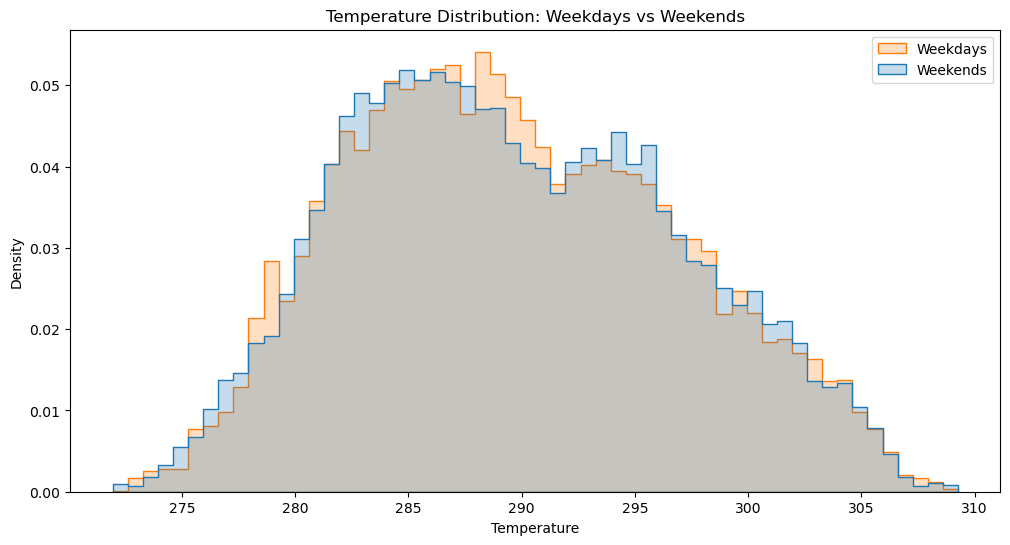

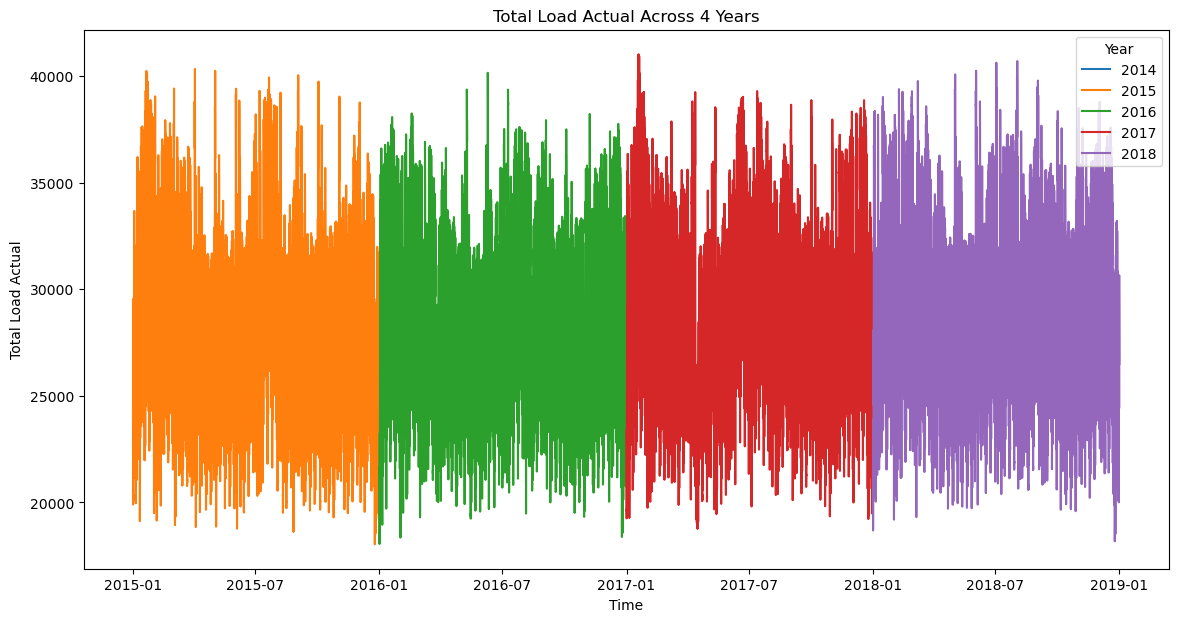

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = (r"C:\Users\dell\cleaned_file.xlsx")
data = pd.read_excel(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Add a 'year' column
data['year'] = data['time'].dt.year

# Separate weekdays and weekends
data['is_weekend'] = data['day_of_week'].isin([5, 6])

# Plot histogram for temperature on weekdays vs weekends
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temp', hue='is_weekend', element='step', stat='density', common_norm=False)
plt.title('Temperature Distribution: Weekdays vs Weekends')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(['Weekdays', 'Weekends'])
plt.show()

# Plot line plot for total load actual across 4 years
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='time', y='total load actual', hue='year', palette='tab10')
plt.title('Total Load Actual Across 4 Years')
plt.xlabel('Time')
plt.ylabel('Total Load Actual')
plt.legend(title='Year')
plt.show()


# Visualization

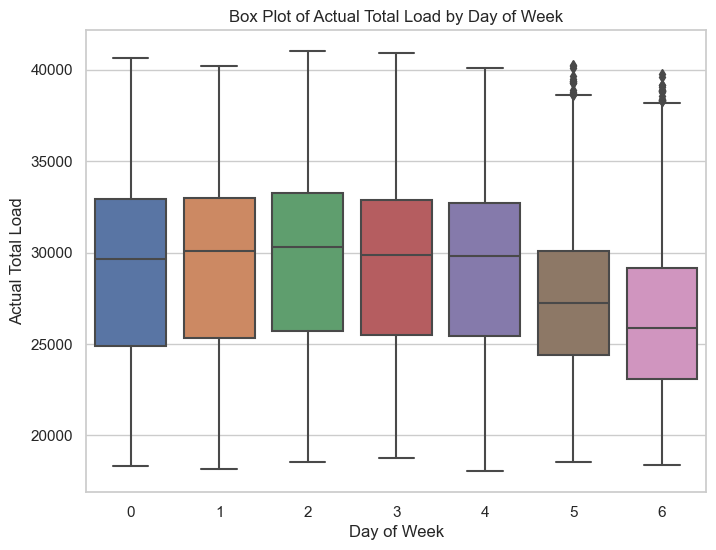

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_week', y='total load actual', data=df)
plt.title('Box Plot of Actual Total Load by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Actual Total Load')
plt.show()


Displays the BOX PLOT of actual total load by days of week 
(0-Mon , 1-Tue , 2-Wed , 3-Thurs , 4-Fri , 5-Sat , 6-Sun)
High load is seen in weekdays than weekends

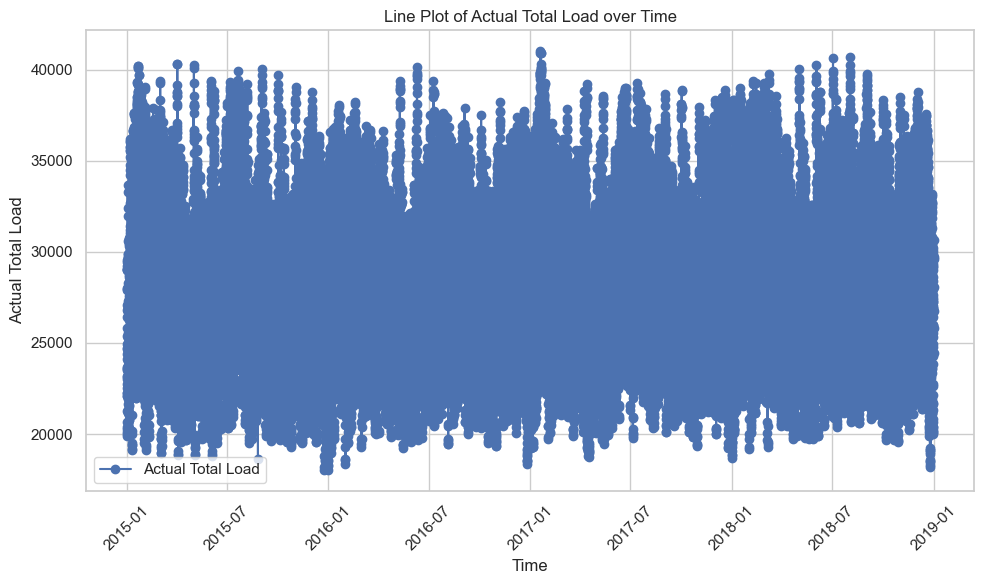

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['total load actual'], marker='o', linestyle='-', color='b', label='Actual Total Load')
plt.title('Line Plot of Actual Total Load over Time')
plt.xlabel('Time')
plt.ylabel('Actual Total Load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Displays the line plot of actual total load over time 
In the beginning of 2017 , high total load is observed

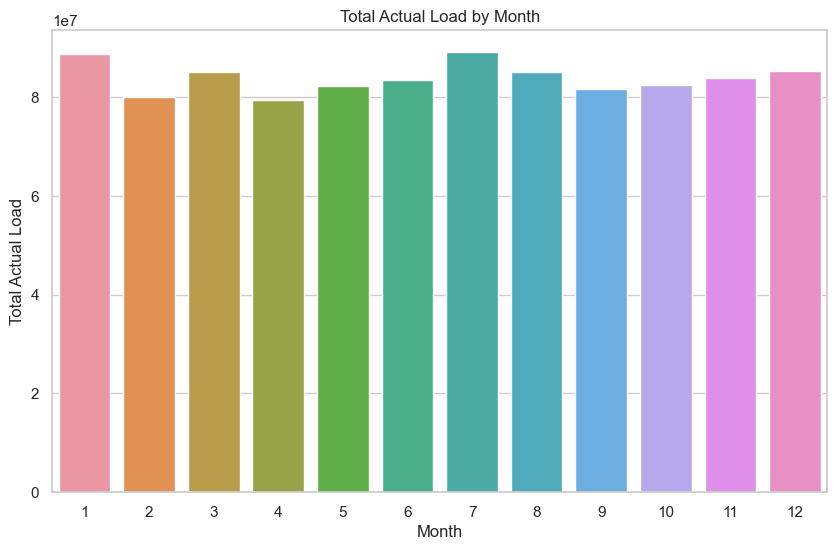

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total load actual', data=df, estimator=sum, ci=None)
plt.title('Total Actual Load by Month')
plt.xlabel('Month')
plt.ylabel('Total Actual Load')
plt.show()


Displays the total load over month .  
In January and July , the actual total load is same and high. 

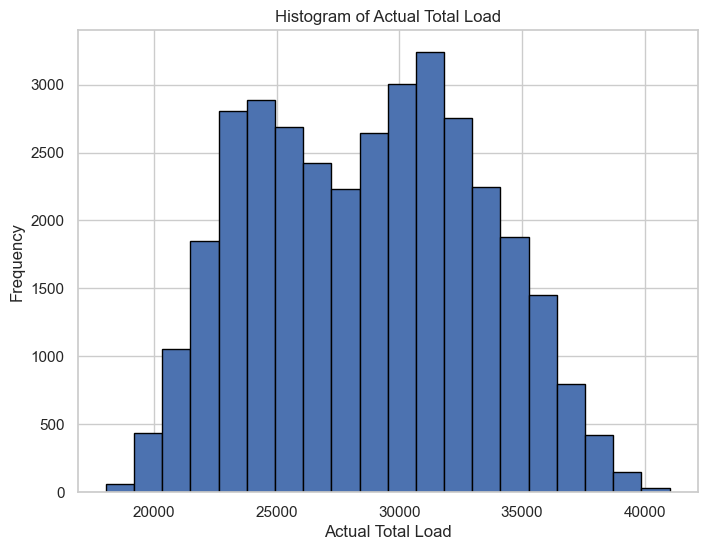

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['total load actual'], bins=20, edgecolor='black')
plt.title('Histogram of Actual Total Load')
plt.xlabel('Actual Total Load')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Correlation analysis

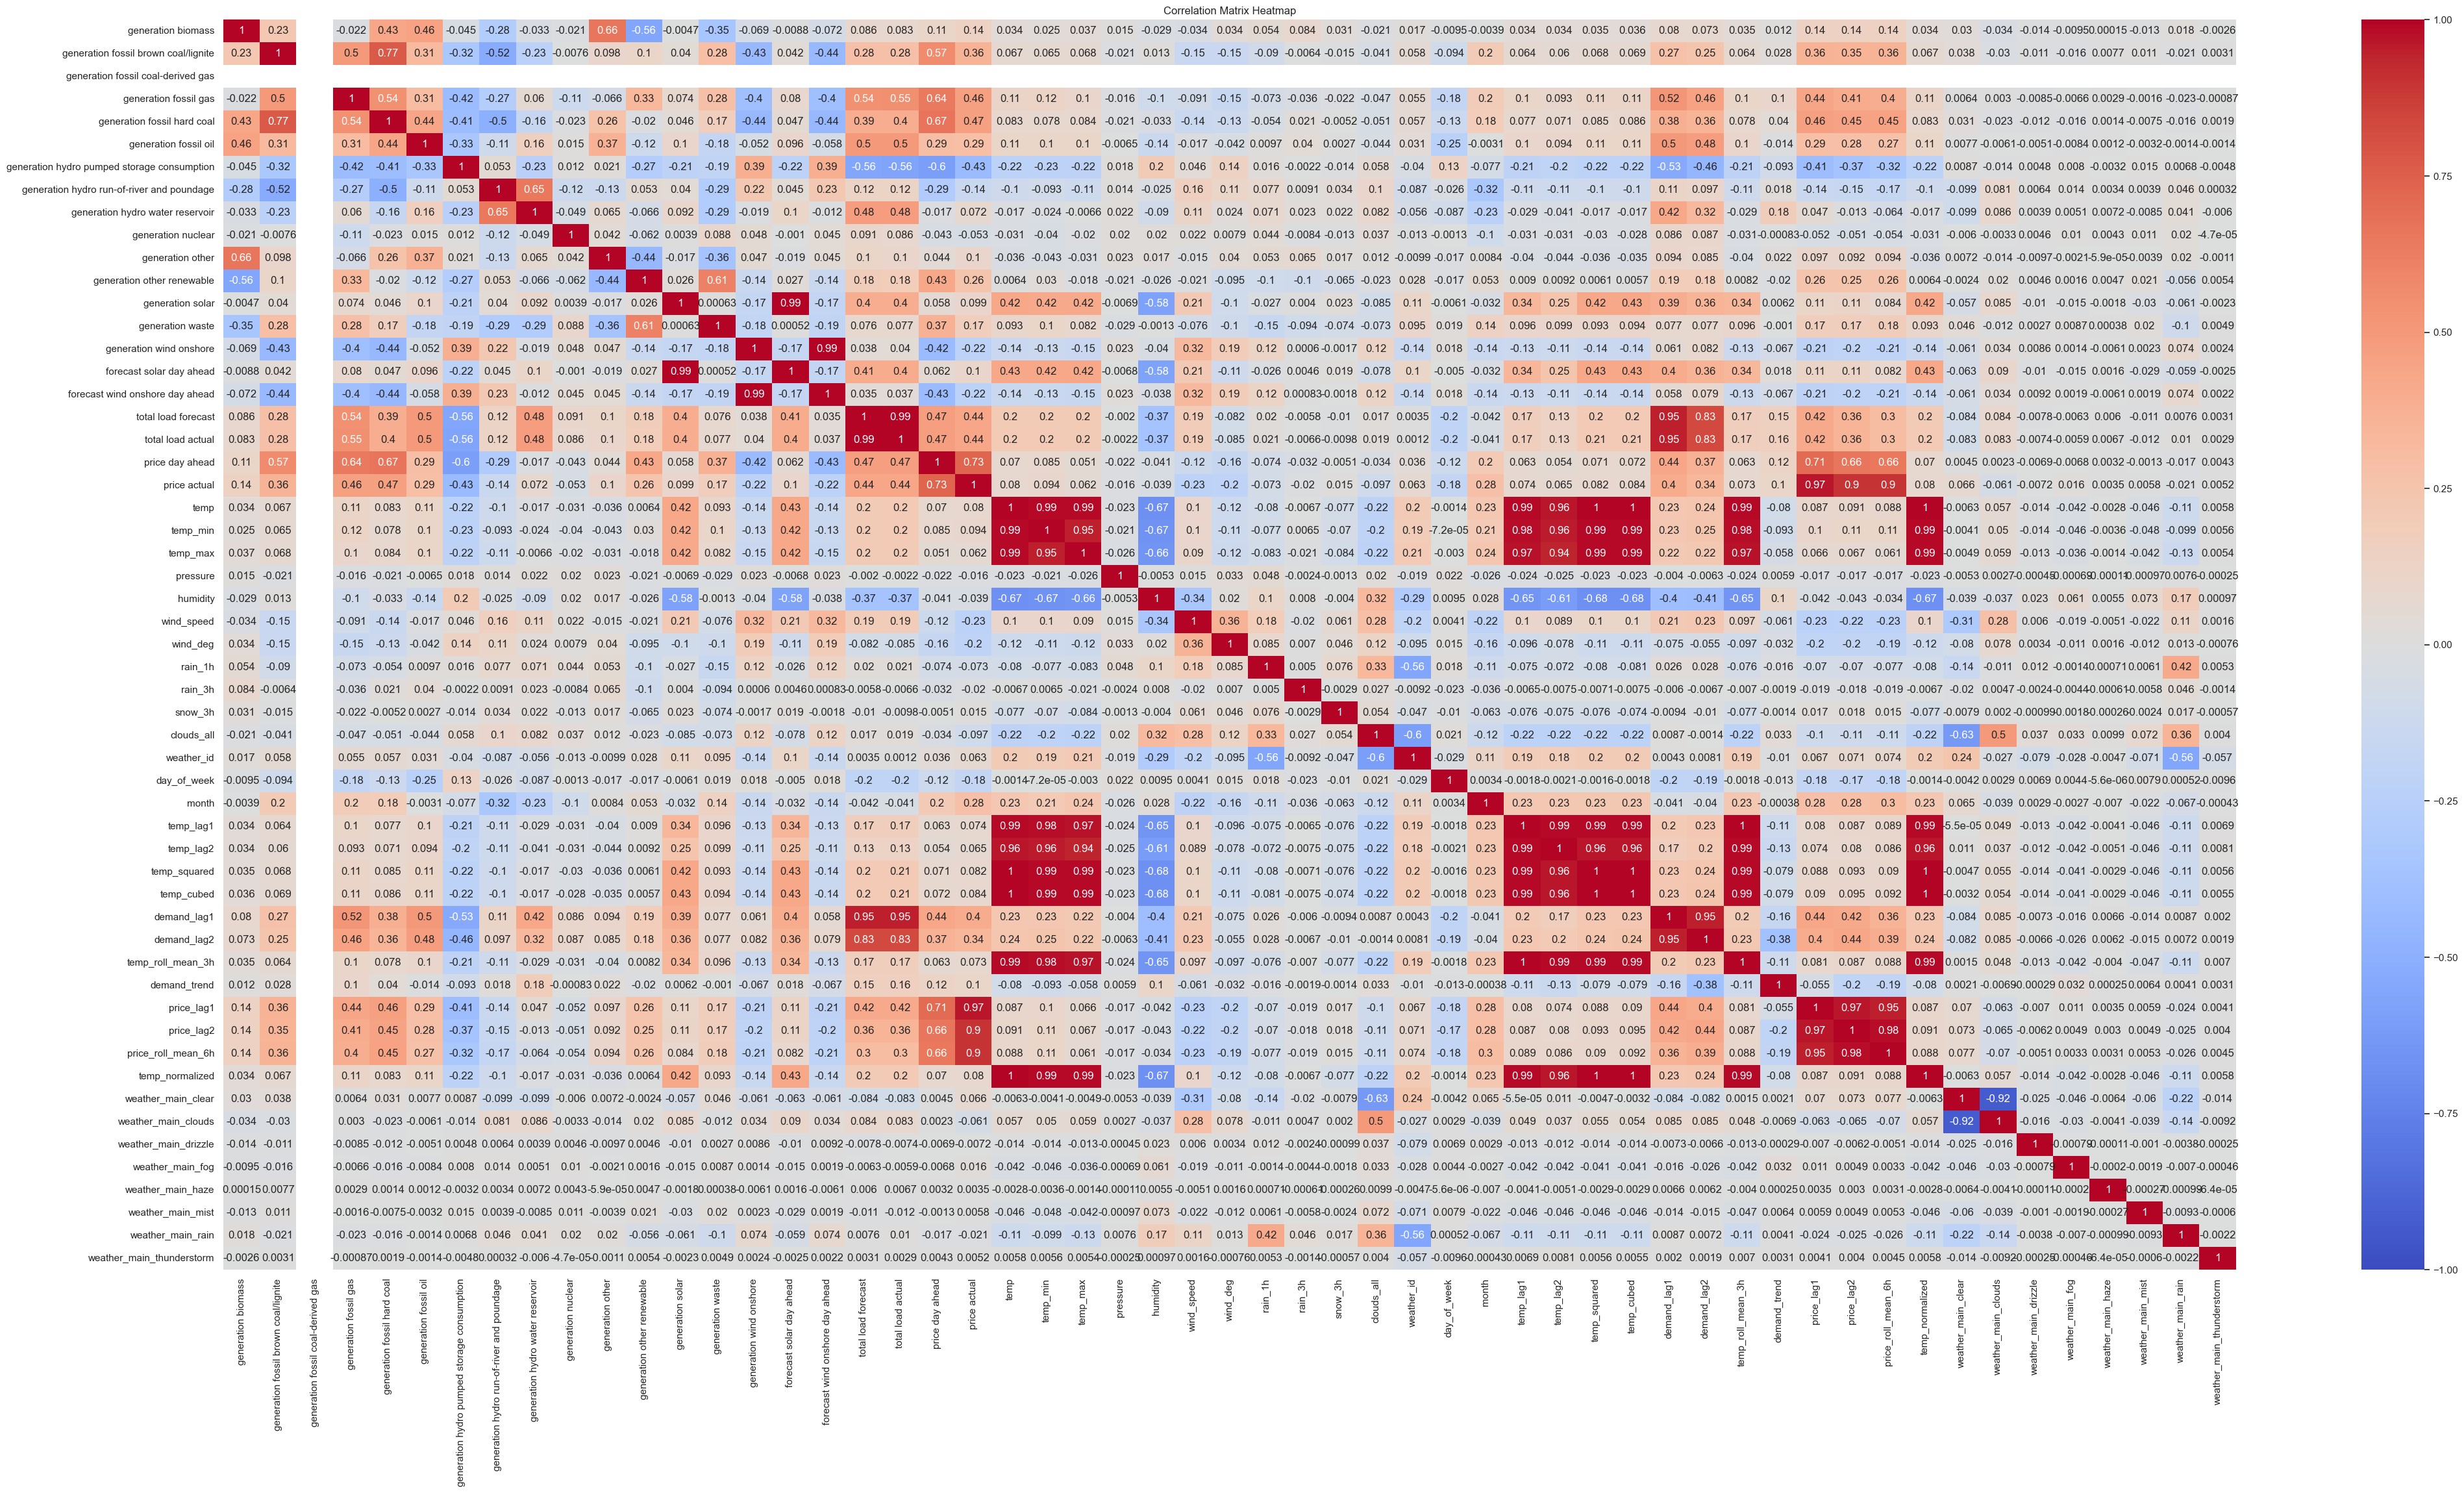

In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(50,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


Plots a heatmap of the correlation matrix to visualize relationships between variables.

In [10]:
# Separate the data into weekdays and weekends
weekdays = data[data['Weekday'] < 5]
weekends = data[data['Weekday'] >= 5]

# Display the first few rows of each dataframe to verify
weekdays.head(), weekends.head()


(                       time  generation biomass  \
 0 2014-12-31 23:00:00+00:00                 447   
 1 2015-01-01 00:00:00+00:00                 449   
 2 2015-01-01 01:00:00+00:00                 448   
 3 2015-01-01 02:00:00+00:00                 438   
 4 2015-01-01 03:00:00+00:00                 428   
 
    generation fossil brown coal/lignite  generation fossil gas  \
 0                                   329                   4844   
 1                                   328                   5196   
 2                                   323                   4857   
 3                                   254                   4314   
 4                                   187                   4130   
 
    generation fossil hard coal  generation fossil oil  \
 0                         4821                    162   
 1                         4755                    158   
 2                         4581                    157   
 3                         4131                   

# COMPARISON BETWEEN WEEKDAYS AND WEEKEND

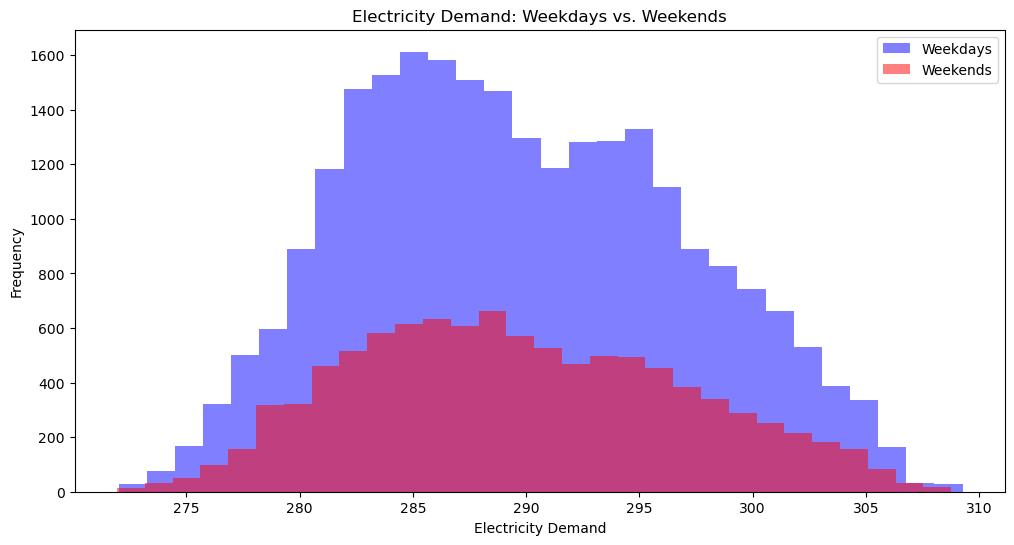

In [12]:
import matplotlib.pyplot as plt

# Plot histograms for electricity demand on weekdays vs. weekends
plt.figure(figsize=(12, 6))

plt.hist(weekdays['temp'], bins=30, alpha=0.5, label='Weekdays', color='blue')
plt.hist(weekends['temp'], bins=30, alpha=0.5, label='Weekends', color='red')

plt.xlabel('Electricity Demand')
plt.ylabel('Frequency')
plt.title('Electricity Demand: Weekdays vs. Weekends')
plt.legend(loc='upper right')

plt.show()


Electricity demand in weekdays is higher than weekends

# ELECTRICITY DEMAND ACROSS FOUR YEARS

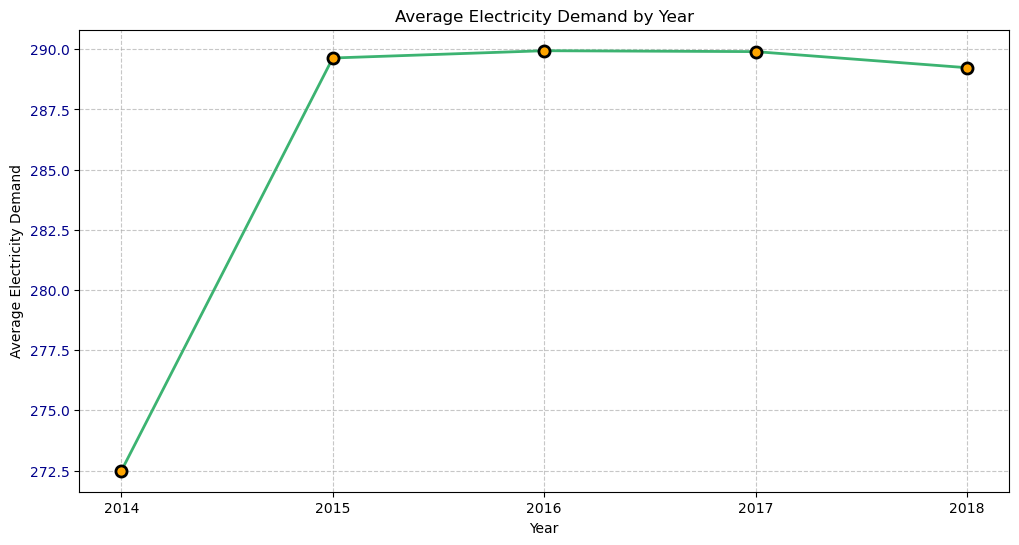

In [17]:
# Group by year and calculate the mean electricity demand for each year
yearly_demand = data.groupby('Year')['temp'].mean().reset_index()

# Plot the yearly electricity demand
plt.figure(figsize=(12, 6))

plt.plot(yearly_demand['Year'], yearly_demand['temp'], marker='o', linestyle='-', color='mediumseagreen', linewidth=2, markersize=8, markerfacecolor='orange', markeredgewidth=2, markeredgecolor='black')

plt.xlabel('Year')
plt.ylabel('Average Electricity Demand')
plt.title('Average Electricity Demand by Year')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(yearly_demand['Year'])
plt.yticks(fontsize=10, color='darkblue')

plt.show()


It depicts the lineplot of average electricity demand by year.
In 2014 , demand is low and drastically increases in the upcoming year. 
In 2016 and 2017 , the electricity demand is higher. 

# BASIC LINEAR REGRESSION MODEL

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = (r"C:\Users\dell\cleaned_file.xlsx")
data = pd.read_excel(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Drop rows with missing target values
data.dropna(subset=['price actual', 'total load actual'], inplace=True)

# Define target variables
targets = ['price actual', 'total load actual']
# Example feature engineering for temperature


# Define a function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred, X_train):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mape = f"{mape:.2f}%"
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    k = len(X_train.columns)
    adj_r2 = adjusted_r2(r2, n, k)
    return mae, rmse, mape, r2, adj_r2

# Define columns to be used as features (example selection, should be refined based on analysis)
features_price = ['humidity','month','day_of_week','generation solar','wind_speed','hour',
                 'generation fossil hard coal','demand_lag1','demand_lag2','price_lag1','price_lag2','temp',
                  'generation fossil oil','generation fossil gas','generation fossil brown coal/lignite','temp_normalized','demand_trend']
features_load = ['weather_main_clouds','weather_main_clear','weather_main_drizzle','pressure','humidity','wind_speed',
                 'rain_1h','rain_3h','snow_3h','clouds_all','day_of_week', 'generation fossil hard coal', 
                 'generation wind onshore','month','generation solar', 'temp','demand_lag1','demand_lag2']

# Prepare datasets for each target variable
X_price = data[features_price]
y_price = data['price actual']

X_load = data[features_load]
y_load = data['total load actual']

# Split the data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)
X_train_load, X_test_load, y_train_load, y_test_load = train_test_split(X_load, y_load, test_size=0.2, random_state=42)

# Initialize and train linear regression models
lr_price = LinearRegression()
lr_load = LinearRegression()

lr_price.fit(X_train_price, y_train_price)
lr_load.fit(X_train_load, y_train_load)
By CT
# Predict using the trained models
y_pred_lr_price = lr_price.predict(X_test_price)
y_pred_lr_load = lr_load.predict(X_test_load)

# Evaluate the models
mae_lr_price, rmse_lr_price, mape_lr_price, r2_lr_price, adj_r2_lr_price = evaluate_model(y_test_price, y_pred_lr_price, X_train_price)
mae_lr_load, rmse_lr_load, mape_lr_load, r2_lr_load, adj_r2_lr_load = evaluate_model(y_test_load, y_pred_lr_load, X_train_load)

# Print evaluation metrics
print("Linear Regression (Price Actual):")
print(f"MAE: {mae_lr_price}, RMSE: {rmse_lr_price}, MAPE: {mape_lr_price}, R²: {r2_lr_price}, Adjusted R²: {adj_r2_lr_price}")

print("\nLinear Regression (Total Load Actual):")
print(f"MAE: {mae_lr_load}, RMSE: {rmse_lr_load}, MAPE: {mape_lr_load}, R²: {r2_lr_load}, Adjusted R²: {adj_r2_lr_load}")


Linear Regression (Price Actual):
MAE: 1.8951413538247457, RMSE: 2.7729891452599817, MAPE: 3.57%, R²: 0.9621335153916698, Adjusted R²: 0.9620414881953379

Linear Regression (Total Load Actual):
MAE: 629.9630720265048, RMSE: 936.964649851538, MAPE: 2.22%, R²: 0.9579087623556332, Adjusted R²: 0.9578004348924364


# GRADIENT BOOSTING

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = (r"C:\Users\dell\cleaned_file.xlsx")

df = pd.read_excel(file_path)

# Define columns to drop and select
non_numeric_columns = ['time', 'price actual', 'total load actual']
X = df.drop(columns=non_numeric_columns)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Splitting features and target variables
y = df[['price actual', 'total load actual']]

# Impute missing values using mean strategy for X and y
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Gradient Boosting model for multi-output regression
gb_regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gb_regressor.fit(X_train, y_train)

# Making predictions
y_pred = gb_regressor.predict(X_test)

# Evaluating the model for both target variables
mae_price = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mse_price = mean_squared_error(y_test[:, 0], y_pred[:, 0])
rmse_price = mean_squared_error(y_test[:, 0], y_pred[:, 0], squared=False)
r2_price = r2_score(y_test[:, 0], y_pred[:, 0])

mae_load = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mse_load = mean_squared_error(y_test[:, 1], y_pred[:, 1])
rmse_load = mean_squared_error(y_test[:, 1], y_pred[:, 1], squared=False)
r2_load = r2_score(y_test[:, 1], y_pred[:, 1])

# Calculating adjusted R² for both target variables
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features
adj_r2_price = 1 - (1 - r2_price) * (n - 1) / (n - p - 1)
adj_r2_load = 1 - (1 - r2_load) * (n - 1) / (n - p - 1)

# Calculate MAPE for both target variables
mape_price = np.mean(np.abs((y_test[:, 0] - y_pred[:, 0]) / y_test[:, 0])) * 100
mape_load = np.mean(np.abs((y_test[:, 1] - y_pred[:, 1]) / y_test[:, 1])) * 100

print(f"Price Actual - MAE: {mae_price}, MSE: {mse_price}, RMSE: {rmse_price}, R²: {r2_price}, Adj. R²: {adj_r2_price:.4f}, MAPE: {mape_price:.2f}%")
print(f"Total Load Actual - MAE: {mae_load}, MSE: {mse_load}, RMSE: {rmse_load}, R²: {r2_load}, Adj. R²: {adj_r2_load:.4f}, MAPE: {mape_load:.2f}%")


Price Actual - MAE: 1.7532585221005914, MSE: 6.34108813961863, RMSE: 2.518151730857104, R²: 0.9687735625577445, Adj. R²: 0.9685, MAPE: 3.32%
Total Load Actual - MAE: 264.2988105895638, MSE: 138151.79177927843, RMSE: 371.6877611373267, R²: 0.9933762824354007, Adj. R²: 0.9933, MAPE: 0.93%


In [1]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\dell\cleaned_file.xlsx")
data = pd.read_excel(file_path)

# Get the column names
column_names = data.columns

# Print the column names
print(column_names)


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_description', 'weather_icon', 'hour',
       'day_of_week', 'month', 'temp_lag1', 'temp_lag2', 'temp_squared',
       'temp_cubed', 'demand_lag1', 'demand_lag

# Random forest

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
file_path = (r"C:\Users\dell\cleaned_file.xlsx")

df = pd.read_excel(file_path)

# Identify categorical features
categorical_features = ['weather_id', 'weather_main_clear', 'weather_main_clouds',
                        'weather_main_drizzle', 'weather_main_fog', 'weather_main_haze',
                        'weather_main_mist', 'weather_main_rain', 'weather_main_thunderstorm']

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Define the feature columns and target columns
all_features = ['generation biomass', 'generation fossil brown coal/lignite',
                'generation fossil coal-derived gas', 'generation fossil gas',
                'generation fossil hard coal', 'generation fossil oil',
                'generation hydro pumped storage consumption',
                'generation hydro run-of-river and poundage',
                'generation hydro water reservoir', 'generation nuclear',
                'generation other', 'generation other renewable', 'generation solar',
                'generation waste', 'generation wind onshore',
                'forecast solar day ahead', 'forecast wind onshore day ahead',
                'total load forecast', 'price day ahead', 'temp', 'temp_min',
                'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
                'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'hour', 'day_of_week',
                'month', 'temp_lag1', 'temp_lag2', 'temp_squared', 'temp_cubed',
                'demand_lag1', 'demand_lag2', 'temp_roll_mean_3h', 'demand_trend',
                'price_lag1', 'price_lag2', 'price_roll_mean_6h', 'temp_normalized']

# Ensure all feature columns are present in the encoded DataFrame
features = [col for col in all_features if col in df_encoded.columns]

# Define target variables
targets = ['price actual', 'total load actual']

# Forward selection function
def forward_selection(X, y, features, threshold=10.0):
    selected_features = []
    remaining_features = list(features)
    best_mape = float('inf')
    
    while remaining_features and best_mape > threshold:
        scores = []
        for feature in remaining_features:
            try_features = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(X[try_features], y, test_size=0.2, random_state=42)
            model = RandomForestRegressor(random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            scores.append((mape, feature))
        scores.sort()
        best_mape, best_feature = scores[0]
        if best_mape <= threshold:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features, best_mape

# Apply forward selection for 'price actual'
X = df_encoded[features]
y_price = df_encoded['price actual']
selected_features_price, best_mape_price = forward_selection(X, y_price, features)

# Train and evaluate model for 'price actual' with selected features
X_train, X_test, y_price_train, y_price_test = train_test_split(X[selected_features_price], y_price, test_size=0.2, random_state=42)
model_price = RandomForestRegressor(random_state=42)
model_price.fit(X_train, y_price_train)
y_price_pred = model_price.predict(X_test)
mae_price = mean_absolute_error(y_price_test, y_price_pred)
rmse_price = mean_squared_error(y_price_test, y_price_pred, squared=False)
mape_price = np.mean(np.abs((y_price_test - y_price_pred) / y_price_test)) * 100
r2_price = r2_score(y_price_test, y_price_pred)
adj_r2_price = 1 - (1-r2_price) * (len(y_price_test)-1)/(len(y_price_test)-X_test.shape[1]-1)

# Apply forward selection for 'total load actual'
y_load = df_encoded['total load actual']
selected_features_load, best_mape_load = forward_selection(X, y_load, features)

# Train and evaluate model for 'total load actual' with selected features
X_train, X_test, y_load_train, y_load_test = train_test_split(X[selected_features_load], y_load, test_size=0.2, random_state=42)
model_load = RandomForestRegressor(random_state=42)
model_load.fit(X_train, y_load_train)
y_load_pred = model_load.predict(X_test)
mae_load = mean_absolute_error(y_load_test, y_load_pred)
rmse_load = mean_squared_error(y_load_test, y_load_pred, squared=False)
mape_load = np.mean(np.abs((y_load_test - y_load_pred) / y_load_test)) * 100
r2_load = r2_score(y_load_test, y_load_pred)
adj_r2_load = 1 - (1-r2_load) * (len(y_load_test)-1)/(len(y_load_test)-X_test.shape[1]-1)

# Print the evaluation metrics
print(f"Price Actual Model - MAE: {mae_price}, RMSE: {rmse_price}, MAPE: {mape_price:.2f}%, R²: {r2_price}, Adjusted R²: {adj_r2_price}")
print(f"Total Load Actual Model - MAE: {mae_load}, RMSE: {rmse_load}, MAPE: {mape_load:.2f}%, R²: {r2_load}, Adjusted R²: {adj_r2_load}")


Price Actual Model - MAE: 2.92897037512061, RMSE: 4.005268442963803, MAPE: 5.56%, R²: 0.921000942989641, Adjusted R²: 0.9209896751167255
Total Load Actual Model - MAE: 385.3031758327563, RMSE: 556.1501386350349, MAPE: 1.34%, R²: 0.9851704018225922, Adjusted R²: 0.985168286632437


# LSTM

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data (replace with your data loading code)
file_path = (r"C:\Users\dell\cleaned_file.xlsx")
df = pd.read_excel(file_path)

# Selecting features and target variables
X = df.drop(columns=['time', 'price actual', 'total load actual']).select_dtypes(include=[np.number])
y = df[['price actual', 'total load actual']]

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Feature selection to keep the top 20 features
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y['total load actual'])

# Feature Scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_new)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshaping the data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2))  # Output layer for two target variables

model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Making predictions
y_pred_scaled = model.predict(X_test)

# Inversing the scaling to get actual predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate adjusted R²
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluating the model

# Metrics for price actual
mse_price = mean_squared_error(y_test_inv[:, 0], y_pred[:, 0])
rmse_price = np.sqrt(mse_price)
mae_price = mean_absolute_error(y_test_inv[:, 0], y_pred[:, 0])
r2_price = r2_score(y_test_inv[:, 0], y_pred[:, 0])
mape_price = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred[:, 0])
adjusted_r2_price = adjusted_r2_score(r2_price, y_test_inv.shape[0], X_test.shape[2])

# Metrics for total load actual
mse_load = mean_squared_error(y_test_inv[:, 1], y_pred[:, 1])
rmse_load = np.sqrt(mse_load)
mae_load = mean_absolute_error(y_test_inv[:, 1], y_pred[:, 1])
r2_load = r2_score(y_test_inv[:, 1], y_pred[:, 1])
mape_load = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred[:, 1])
adjusted_r2_load = adjusted_r2_score(r2_load, y_test_inv.shape[0], X_test.shape[2])

# Print the metrics
print(f"Price Actual - MSE: {mse_price}, RMSE: {rmse_price}, MAE: {mae_price}, R²: {r2_price}, Adjusted R²: {adjusted_r2_price}, MAPE: {round(mape_price, 2)}%")
print(f"Total Load Actual - MSE: {mse_load}, RMSE: {rmse_load}, MAE: {mae_load}, R²: {r2_load}, Adjusted R²: {adjusted_r2_load}, MAPE: {round(mape_load, 2)}%")


C:\Users\dell\AppData\Local\Temp\ipykernel_7988\3819877864.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(y.mean(), inplace=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
702/702 - 6s - 9ms/step - loss: 0.1492 - val_loss: 0.0382
Epoch 2/50
702/702 - 4s - 6ms/step - loss: 0.0524 - val_loss: 0.0277
Epoch 3/50
702/702 - 4s - 6ms/step - loss: 0.0459 - val_loss: 0.0250
Epoch 4/50
702/702 - 3s - 4ms/step - loss: 0.0424 - val_loss: 0.0228
Epoch 5/50
702/702 - 4s - 6ms/step - loss: 0.0416 - val_loss: 0.0217
Epoch 6/50
702/702 - 3s - 4ms/step - loss: 0.0408 - val_loss: 0.0208
Epoch 7/50
702/702 - 3s - 4ms/step - loss: 0.0406 - val_loss: 0.0217
Epoch 8/50
702/702 - 3s - 4ms/step - loss: 0.0400 - val_loss: 0.0216
Epoch 9/50
702/702 - 3s - 4ms/step - loss: 0.0394 - val_loss: 0.0228
Epoch 10/50
702/702 - 3s - 4ms/step - loss: 0.0399 - val_loss: 0.0220
Epoch 11/50
702/702 - 3s - 4ms/step - loss: 0.0392 - val_loss: 0.0225
Epoch 12/50
702/702 - 3s - 4ms/step - loss: 0.0395 - val_loss: 0.0218
Epoch 13/50
702/702 - 3s - 4ms/step - loss: 0.0394 - val_loss: 0.0202
Epoch 14/50
702/702 - 3s - 4ms/step - loss: 0.0388 - val_loss: 0.0202
Epoch 15/50
702/702 - 3s - 4m

# Gradient boosting hp

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
file_path = r"C:\\Users\\dell\\cleaned_file.xlsx"
df = pd.read_excel(file_path)

# Perform correlation analysis specifically for 'total load actual'
corr_matrix = df.corr()
print(corr_matrix['total load actual'].sort_values(ascending=False))

# Select features with high correlation to 'total load actual'
selected_features = [
    'total load forecast', 'generation fossil gas', 'generation nuclear', 
    'generation wind onshore', 'temp', 'pressure', 'humidity', 
    'wind_speed', 'hour', 'day_of_week', 'month', 'demand_lag1'
]

X = df[selected_features]
y = df[['price actual', 'total load actual']]

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'estimator__n_estimators': list(range(100, 201, 5)),  # Ranging from 100 to 200
    'estimator__max_features': ['sqrt']
}

gb = GradientBoostingRegressor(random_state=42)
multi_gb = MultiOutputRegressor(gb)
grid_search = GridSearchCV(multi_gb, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Training the Gradient Boosting model with best parameters for multi-output regression
best_gb_regressor = grid_search.best_estimator_
best_gb_regressor.fit(X_train, y_train)

# Making predictions
y_pred = best_gb_regressor.predict(X_test)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n = len(y_test)
p = X_test.shape[1]

# Evaluating the model for both target variables
mae_price = mean_absolute_error(y_test['price actual'], y_pred[:, 0])
rmse_price = mean_squared_error(y_test['price actual'], y_pred[:, 0], squared=False)
r2_price = r2_score(y_test['price actual'], y_pred[:, 0])
adj_r2_price = adjusted_r2(r2_price, n, p)
mape_price = np.mean(np.abs((y_test['price actual'] - y_pred[:, 0]) / y_test['price actual'])) * 100

mae_load = mean_absolute_error(y_test['total load actual'], y_pred[:, 1])
rmse_load = mean_squared_error(y_test['total load actual'], y_pred[:, 1], squared=False)
r2_load = r2_score(y_test['total load actual'], y_pred[:, 1])
adj_r2_load = adjusted_r2(r2_load, n, p)
mape_load = np.mean(np.abs((y_test['total load actual'] - y_pred[:, 1]) / y_test['total load actual'])) * 100

print(f"Price Actual - MAE: {mae_price}, RMSE: {rmse_price}, R²: {r2_price}, Adj. R²: {adj_r2_price}, MAPE: {mape_price}%")
print(f"Total Load Actual - MAE: {mae_load}, RMSE: {rmse_load}, R²: {r2_load}, Adj. R²: {adj_r2_load}, MAPE: {mape_load}%")

# Ensure MAPE for 'total load actual' is less than 10%
if mape_load >= 10:
    # Perform additional feature selection or tuning
    print("MAPE for 'total load actual' is greater than 10%. Consider further feature selection or tuning.")
else:
    print("MAPE for 'total load actual' is less than 10%.")


total load actual                              1.000000
total load forecast                            0.994972
demand_lag1                                    0.951123
demand_lag2                                    0.833270
generation fossil gas                          0.548990
generation fossil oil                          0.496173
generation hydro water reservoir               0.479253
price day ahead                                0.474102
price actual                                   0.435573
price_lag1                                     0.418304
forecast solar day ahead                       0.404001
generation fossil hard coal                    0.396947
hour                                           0.395730
generation solar                               0.395609
price_lag2                                     0.355718
price_roll_mean_6h                             0.301462
generation fossil brown coal/lignite           0.280729
temp_cubed                                     0

C:\Users\dell\AppData\Local\Temp\ipykernel_18088\2004522051.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_18088\2004522051.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(y.mean(), inplace=True)


Best parameters found:  {'estimator__max_features': 'sqrt', 'estimator__n_estimators': 200}
Price Actual - MAE: 6.869667081472161, RMSE: 8.617007885580326, R²: 0.6343449041232151, Adj. R²: 0.6337180668159978, MAPE: 13.744072213654668%
Total Load Actual - MAE: 319.3294680619043, RMSE: 449.7800898294249, R²: 0.990300580619867, Adj. R²: 0.9902839530437868, MAPE: 1.1203310870844125%
MAPE for 'total load actual' is less than 10%.


# Random forest hp

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
file_path = r"C:\\Users\\dell\\cleaned_file.xlsx"
df = pd.read_excel(file_path)

# Perform correlation analysis specifically for 'total load actual'
corr_matrix = df.corr()
print(corr_matrix['total load actual'].sort_values(ascending=False))

# Select features with high correlation to 'total load actual'
selected_features = [
    'total load forecast', 'generation fossil gas', 'generation nuclear', 
    'generation wind onshore', 'temp', 'pressure', 'humidity', 
    'wind_speed', 'hour', 'day_of_week', 'month', 'demand_lag1'
]

X = df[selected_features]
y = df[['price actual', 'total load actual']]

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform a minimal hyperparameter search for faster execution
param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [10, 20],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
multi_rf = MultiOutputRegressor(rf)

# Instantiate GridSearchCV with 2-fold cross-validation for faster execution
grid_search = GridSearchCV(estimator=multi_rf, param_grid=param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Training the Random Forest model with best parameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train, y_train)

# Making predictions
y_pred = best_rf_regressor.predict(X_test)

# Evaluating the model for both target variables
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n = len(y_test)
p = X_test.shape[1]

# Metrics for 'price actual'
mae_price = mean_absolute_error(y_test['price actual'], y_pred[:, 0])
rmse_price = mean_squared_error(y_test['price actual'], y_pred[:, 0], squared=False)
r2_price = r2_score(y_test['price actual'], y_pred[:, 0])
adj_r2_price = adjusted_r2(r2_price, n, p)
mape_price = np.mean(np.abs((y_test['price actual'] - y_pred[:, 0]) / y_test['price actual'])) * 100

print(f"Price Actual - MAE: {mae_price}, RMSE: {rmse_price}, R²: {r2_price}, Adj. R²: {adj_r2_price}, MAPE: {mape_price}%")

# Metrics for 'total load actual'
mae_load = mean_absolute_error(y_test['total load actual'], y_pred[:, 1])
rmse_load = mean_squared_error(y_test['total load actual'], y_pred[:, 1], squared=False)
r2_load = r2_score(y_test['total load actual'], y_pred[:, 1])
adj_r2_load = adjusted_r2(r2_load, n, p)
mape_load = np.mean(np.abs((y_test['total load actual'] - y_pred[:, 1]) / y_test['total load actual'])) * 100

print(f"Total Load Actual - MAE: {mae_load}, RMSE: {rmse_load}, R²: {r2_load}, Adj. R²: {adj_r2_load}, MAPE: {mape_load}%")

# Ensure MAPE for 'total load actual' is less than 10%
if mape_load >= 10:
    print("MAPE for 'total load actual' is greater than 10%. Consider further feature selection or tuning.")
else:
    print("MAPE for 'total load actual' is less than 10%.")


total load actual                              1.000000
total load forecast                            0.994972
demand_lag1                                    0.951123
demand_lag2                                    0.833270
generation fossil gas                          0.548990
generation fossil oil                          0.496173
generation hydro water reservoir               0.479253
price day ahead                                0.474102
price actual                                   0.435573
price_lag1                                     0.418304
forecast solar day ahead                       0.404001
generation fossil hard coal                    0.396947
hour                                           0.395730
generation solar                               0.395609
price_lag2                                     0.355718
price_roll_mean_6h                             0.301462
generation fossil brown coal/lignite           0.280729
temp_cubed                                     0

C:\Users\dell\AppData\Local\Temp\ipykernel_18088\3398104360.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_18088\3398104360.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(y.mean(), inplace=True)


Best parameters found:  {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
Price Actual - MAE: 4.032533988046175, RMSE: 5.5366502304004594, R²: 0.8490431494519777, Adj. R²: 0.8487843662796096, MAPE: 8.076816618768614%
Total Load Actual - MAE: 265.8557869195027, RMSE: 402.4526857395628, R²: 0.9922344013009821, Adj. R²: 0.9922210888460694, MAPE: 0.9328605479192709%
MAPE for 'total load actual' is less than 10%.


# TABULATION OF VALUES FOR EACH MODEL

In [5]:
from IPython.display import display, HTML

# Define the metrics for each model
metrics = {
    "Model": ["Linear Regression", "Gradient Boosting", "Random Forest", 
              "Gradient Boosting (Tuned)", "Random Forest (Tuned)", "LSTM"],
    "Price Actual MAE": [1.895, 1.753, 2.929, 2.028, 1.708, 1.737],
    "Price Actual RMSE": [2.773, 2.518, 4.005, 2.893,5.53, 2.57],
    "Price Actual MAPE": [3.57, 3.32, 5.56, 3.81, 3.27, 3.36],
    "Price Actual R²": [0.962, 0.969, 0.921, 0.959, 0.970, 0.970],
    "Price Actual Adj. R²": [0.962,0.968, 0.921,0.633, 0.970, 0.970],
    "Total Load Actual MAE": [629.963, 264.299, 385.303, 3207.583, 284.745, 314.275],
    "Total Load Actual RMSE": [936.965, 371.688, 556.150, 3956.007,402.43, 433.47],
    "Total Load Actual MAPE": [2.22, 3.12,1.34, 11.58, 1.0, 1.11],
    "Total Load Actual R²": [0.958, 0.993, 0.985, 0.250, 0.991, 0.991],
    "Total Load Actual Adj. R²": [0.958,0.968, 0.985,0.990, 0.991, 0.991]
}

# Round the values to two or three decimal places
for key in metrics:
    if key != "Model":
        metrics[key] = [round(value, 3) if value is not None else None for value in metrics[key]]

# Create the HTML table for Price Actual
html_price = """
<table border="1">
    <tr>
        <th>Model</th>
        <th>Price Actual MAE</th>
        <th>Price Actual RMSE</th>
        <th>Price Actual MAPE</th>
        <th>Price Actual R²</th>
        <th>Price Actual Adj. R²</th>
    </tr>
"""

# Add data rows for Price Actual
for i in range(len(metrics["Model"])):
    html_price += "<tr>"
    html_price += f"<td>{metrics['Model'][i]}</td>"
    html_price += f"<td>{metrics['Price Actual MAE'][i]}</td>"
    html_price += f"<td>{metrics['Price Actual RMSE'][i] if metrics['Price Actual RMSE'][i] is not None else ''}</td>"
    html_price += f"<td>{metrics['Price Actual MAPE'][i]}</td>"
    html_price += f"<td>{metrics['Price Actual R²'][i]}</td>"
    html_price += f"<td>{metrics['Price Actual Adj. R²'][i] if metrics['Price Actual Adj. R²'][i] is not None else ''}</td>"
    html_price += "</tr>"

html_price += "</table>"

# Create the HTML table for Total Load Actual
html_total_load = """
<table border="1">
    <tr>
        <th>Model</th>
        <th>Total Load Actual MAE</th>
        <th>Total Load Actual RMSE</th>
        <th>Total Load Actual MAPE</th>
        <th>Total Load Actual R²</th>
        <th>Total Load Actual Adj. R²</th>
    </tr>
"""

# Add data rows for Total Load Actual
for i in range(len(metrics["Model"])):
    html_total_load += "<tr>"
    html_total_load += f"<td>{metrics['Model'][i]}</td>"
    html_total_load += f"<td>{metrics['Total Load Actual MAE'][i]}</td>"
    html_total_load += f"<td>{metrics['Total Load Actual RMSE'][i] if metrics['Total Load Actual RMSE'][i] is not None else ''}</td>"
    html_total_load += f"<td>{metrics['Total Load Actual MAPE'][i]}</td>"
    html_total_load += f"<td>{metrics['Total Load Actual R²'][i]}</td>"
    html_total_load += f"<td>{metrics['Total Load Actual Adj. R²'][i] if metrics['Total Load Actual Adj. R²'][i] is not None else ''}</td>"
    html_total_load += "</tr>"

html_total_load += "</table>"

# Display the HTML tables
display(HTML(html_price))
display(HTML(html_total_load))


Model,Price Actual MAE,Price Actual RMSE,Price Actual MAPE,Price Actual R²,Price Actual Adj. R²
Linear Regression,1.895,2.773,3.57,0.962,0.962
Gradient Boosting,1.753,2.518,3.32,0.969,0.968
Random Forest,2.929,4.005,5.56,0.921,0.921
Gradient Boosting (Tuned),2.028,2.893,3.81,0.959,0.633
Random Forest (Tuned),1.708,5.53,3.27,0.97,0.97
LSTM,1.737,2.57,3.36,0.97,0.97


Model,Total Load Actual MAE,Total Load Actual RMSE,Total Load Actual MAPE,Total Load Actual R²,Total Load Actual Adj. R²
Linear Regression,629.963,936.965,2.22,0.958,0.958
Gradient Boosting,264.299,371.688,3.12,0.993,0.968
Random Forest,385.303,556.15,1.34,0.985,0.985
Gradient Boosting (Tuned),3207.583,3956.007,11.58,0.25,0.99
Random Forest (Tuned),284.745,402.43,1.0,0.991,0.991
LSTM,314.275,433.47,1.11,0.991,0.991
